O Método de Euler consiste em uma solução númérica de primeira ordem que itera em passos para a resolução de Equações Diferenciais Ordinárias dada uma condição inicial.
Pelo Método de Euler é possível construir um modelo linear local para uma função não linear f(x), por meio de uma sequência de pontos $x_n$, sendo este modelo baseado na reta tangente à função nesses pontos.

Pela definição de derivada,

$x'(t_0) = \lim_{t\rightarrow t_0} \frac{x(t) - x(t_0)}{t-t_0}$.

Ao remover o limite tendendo a zero da equação, tem-se uma aproximação e um erro associado

$x'(t_0) \approx \frac{x(t) - x(t_0)}{t-t_0}$.

Para $x' = f(t, x)$ substituindo na equação anterior, tem-se que

$f(t, x) = \frac{x(t) - x(t_0)}{t-t_0}$.

Ao isolar $x(t)$ é obtido

$x(t) - x(t_0) = (t-t_0) f(t, x)$.

Logo,

$x(t) = x(t_0) + (t-t_0) f(t, x)$.

Em que os termos $x(t_0)$ e $f(t, x)$ são fixos e o termo $(t-t_0)$, denominado passo ($h$), varia a cada iteração.

Sendo assim, o Método de Euler pode ser generalizado da seguinte forma

$x_{n+1} = x_n + hf(t_n, x_n)$.

Aplicando o Método de Euler para fornecer uma solução numérica ao modelo de Malthus $x' = λx$, é obtido

$x_{n+1} = x_n + hλx$.

In [1]:
# Importações:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def metodo_de_euler(x0, λ0, t0, tf, h):
    
    ''' Função para aplicar o Método de Euler ao Modelo de Malthus e comparar com a solução analítica deste tipo de caso,
    apresentando os gráficos e erro cometido na sequência.
    
    Parâmetros de entrada:
        x0 = Determina a condição inicial da função e varia a cada iteração, sendo armazenado em uma lista vazia
        λ0 = Fator de multiplicação, cujo valor determinado é fixo
        t0 = Define o tempo inicial do intervalo a ser iterado
        tf = Define o tempo final do intervalo a ser iterado
        h = Corresponde ao valor do passo que é dado, ou seja, ao espaçamento do intervalo previamente adotado
        
    Parâmetros de saída:
        Uma lista contendo os valores iterados de x obtidos pelo Método de Euler
        Uma lista contendo os valores iterados de x obtidos pela solução analítica
        Uma lista contendo os valores dos passos no intervalo estabelecido
        
    Observação: Os parâmetros de saída permitem que os dados da lista sejam manipulados
    matematicamente e graficamente fora da função
    '''

    # Definir a EDO

    def f(x, λ):
        return λ*x
    
    # Definir a função analítica
    
    def x(t):
        return 0.1*np.exp(0.1*t)

    # Definir o PVI

    x0 = 0.1
    λ0 = 0.1

    # Definir o intervalo

    tf = 75
    t0 = 0

    # Calcular o passo

    intervalo = list(np.arange(t0, tf, h))
    iteracoes = len(intervalo)
    
    listax = [] # Lista vazia para armazenar os valores de x do método numérico
    listaxt = [] # Lista vazia para armazenar os valores de x da solução analítica
    
    # Loop para iterar na EDO

    for i in range(iteracoes):
        xn = x0 + h * f(λ0, x0)
        #print(f'x{i+1} = {xn}')
        x0 = xn # Variável temporária para hospedar o valor de x a cada iteração
        listax.append(x0)
        
    # Loop para iterar na solução analítica
        
    for n in intervalo:
        xi = x(n)
        #print(f'x(t) para t = {n+1}: {xi}')
        t = xi
        listaxt.append(t)
        
    # Gera um gráfico comparativo entre a aproximação pelo Método de Euler e a solução analítica
        
    plt.figure(figsize = (12, 8))
    plt.plot(intervalo, listax, 'bo--', label='Aproximação')
    plt.plot(intervalo, listaxt, 'r', label='Solução Analítica')
    plt.title('Aproximação pelo Método de Euler x Solução Analítica')
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.legend()
    plt.grid()
    plt.show()
    
    # Calcula o erro cometido durante o processo de aproximação
    
    erro_cometido = abs(listaxt[-1]-listax[-1])
    
    print('O erro cometido foi:', erro_cometido)
    
    # Retorna as listas geradas pelo algoritmo Método de Euler
    
    return intervalo, listax, listaxt

#### Condição 1:

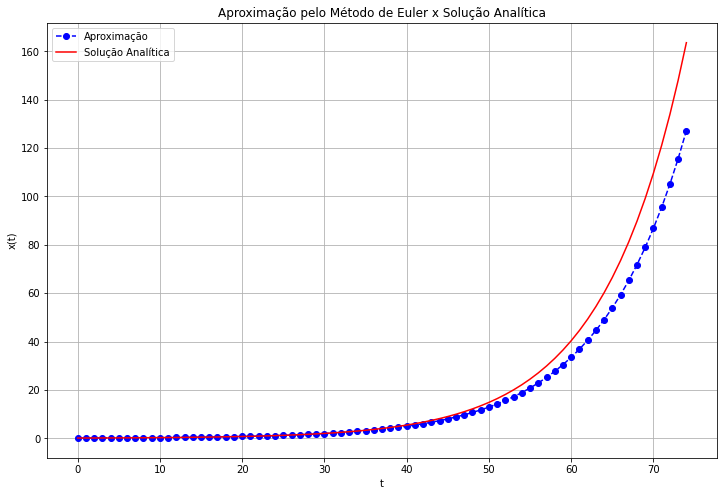

O erro cometido foi: 36.408905860086065


In [3]:
x0 = 0.1
λ0 = 0.1

tf = 75
t0 = 0

h = 1

condicao_1 = metodo_de_euler(x0, λ0, t0, tf, h)

#### Condição 2:

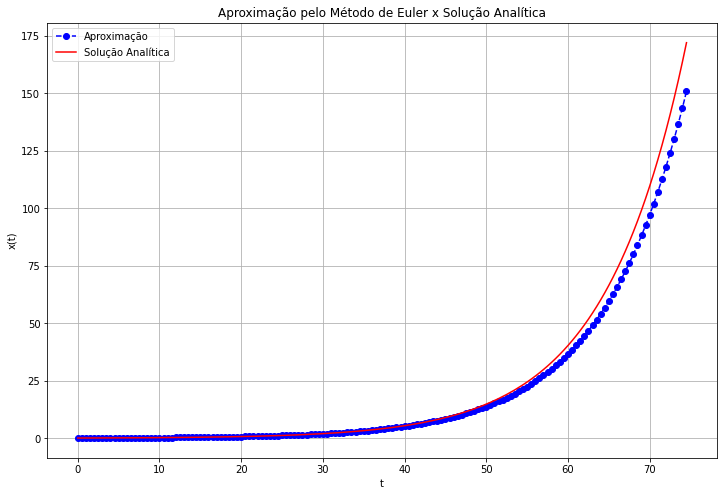

O erro cometido foi: 21.18856493228847


In [4]:
x0 = 0.1
λ0 = 0.1

tf = 75
t0 = 0

h = 0.5

condicao_2 = metodo_de_euler(x0, λ0, t0, tf, h)

#### Condição 3:

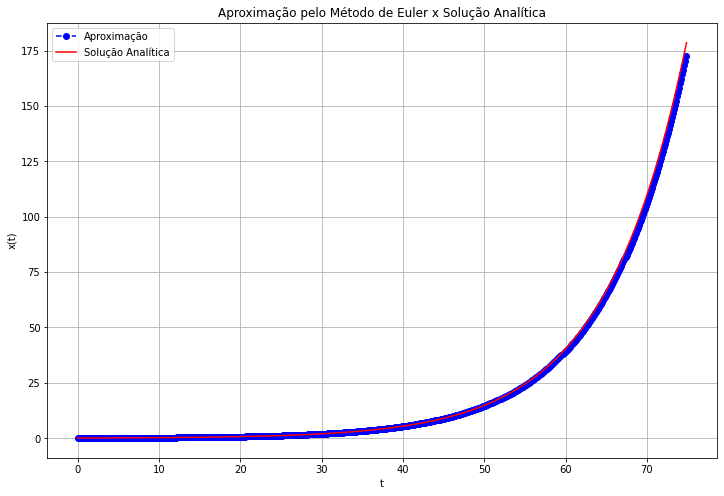

O erro cometido foi: 5.9668628672362445


In [5]:
x0 = 0.1
λ0 = 0.1

tf = 75
t0 = 0

h = 0.125

condicao_3 = metodo_de_euler(x0, λ0, t0, tf, h)

#### Comparação entre o Método de Euler para as condições 1, 2 e 3 e a solução analítica

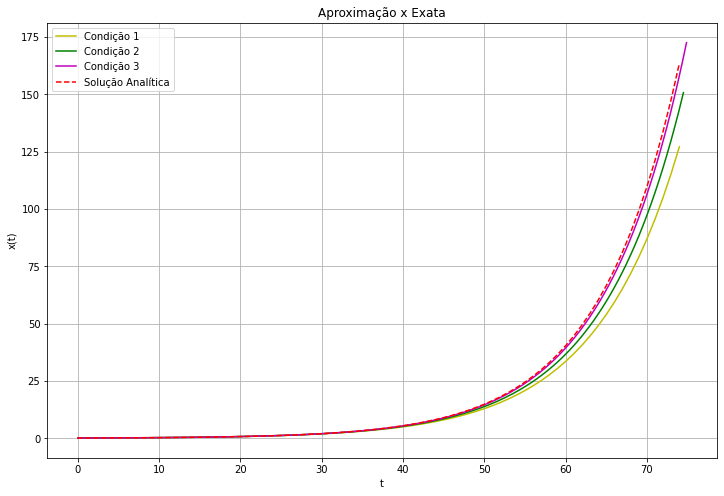

In [6]:
plt.figure(figsize = (12, 8))
plt.plot(condicao_1[0], condicao_1[1], 'y', label='Condição 1')
plt.plot(condicao_2[0], condicao_2[1], 'g', label='Condição 2')
plt.plot(condicao_3[0], condicao_3[1], 'm', label='Condição 3')
plt.plot(condicao_1[0], condicao_1[2], 'r--', label='Solução Analítica')
plt.title('Aproximação x Exata')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.grid()
plt.show()

#### Conclusão:

Foi constatado que ao diminuir o espaçamento de h, os resultados de aproximação para x também diminuíram, o que evidencia melhor acurácia para os valores iterativos de x se aproximando da solução analítica $x(t)=0.1e^{0.1t}$ quando o valor do passo é bem pequeno.

Este algoritmo foi testado para um intervalo de 0 a 25 / 50 / 75, e percebe-se que, assim como o número de passos, quanto maior o intervalo definido, maior é o erro cometido, visto que h está sendo aplicado a uma região maior da função exponencial e quanto mais se afasta da derivada tendendo a zero, mais esse erro se torna evidente.

Outra observação é que o número de passos influencia na quantidade de iterações realizadas, e quanto mais iterações ocorrerem, menor é o erro cometido, no entanto maior é o processamento computacional para obter um melhor resultado.